In [ ]:
# PLOTTING IN PYTHON

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/penguins_simple.csv', sep=';')  #change path to your local copy of the data penguins_simple.csv

In [3]:
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


## 1. Plotting with pandas

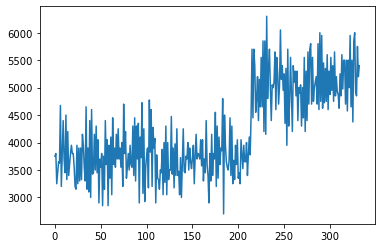

In [4]:
#plot one column
df['Body Mass (g)'].plot()  # default line-plot

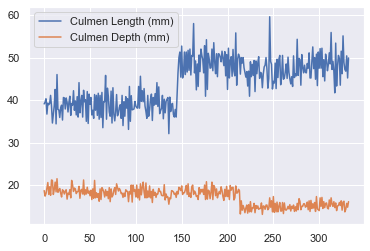

In [107]:
# plot two columns
df[['Culmen Length (mm)', 'Culmen Depth (mm)']].plot()

In [108]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


#### Let's try to answer following questions!
1. Do larger penguins have longer flippers?  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


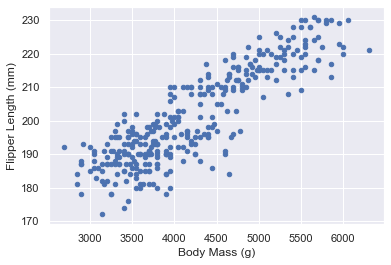

In [109]:
df.plot(x='Body Mass (g)', y='Flipper Length (mm)', kind='scatter')

2. Visualize the distribution of Culmen Length

In [110]:
# histogram, violin-plots, boxplots,....

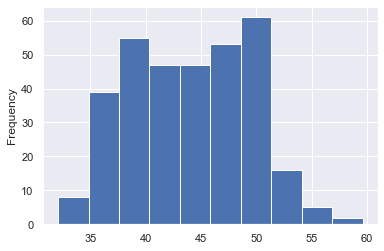

In [111]:
df['Culmen Length (mm)'].plot(kind='hist')

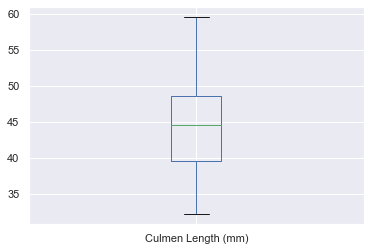

In [112]:
df['Culmen Length (mm)'].plot(kind='box')

In [ ]:
# green line: median
# blue box: middle 50% 
# whiskers: show highest and lowest occuring value 

In [9]:
df_bmx = df.groupby('Species')['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'].mean().reset_index()
df_bmx 

<ipython-input-9-da1fb6458ba7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bmx = df.groupby('Species')['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'].mean().reset_index()


,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm)
0,Adelie,38.823973,18.347260,190.102740
1,Chinstrap,48.833824,18.420588,195.823529
2,Gentoo,47.568067,14.996639,217.235294


<ipython-input-7-8c6e1917c0fc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bmx = df.groupby('Species')['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'].mean().reset_index()


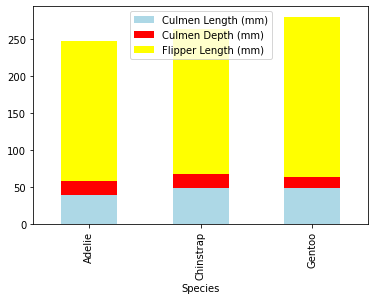

In [7]:
df_bmx.plot(x = 'Species', 
            y=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'], 
            kind = 'bar', stacked=True,
            color = ['lightblue', 'red', 'yellow'], 
            fontsize=10)

In [15]:
df_edu_marit = df.groupby('Species')['Species'].count()
pd.Series(df_edu_marit)

Species
Adelie       146
Chinstrap     68
Gentoo       119
Name: Species, dtype: int64

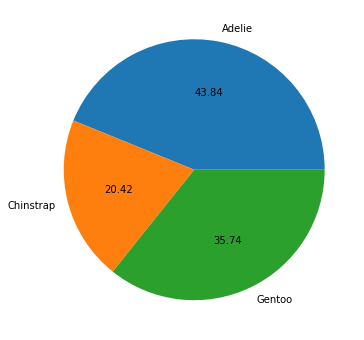

In [12]:
# pie chart
ax = pd.Series(df_edu_marit).plot.pie(subplots=True, label='',
     figsize = (8, 6), autopct = '%.2f')

3. Are male penguins heavier than female penguins?

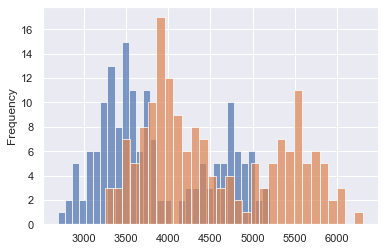

In [113]:
df[df['Sex'] == 'FEMALE']['Body Mass (g)'].plot(kind='hist', alpha=0.7, bins=30)
df[df['Sex'] == 'MALE']['Body Mass (g)'].plot(kind='hist', alpha=0.7, bins=30)

#### Other plots with pandas: 
check the documentation here: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

## 2. Plotting with Matplotlib

In [19]:
!pip install matplotlib  # one time installation

In [5]:
import matplotlib.pyplot as plt

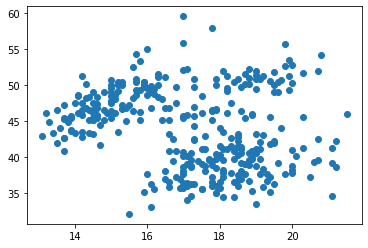

In [6]:
plt.scatter(x=df['Culmen Depth (mm)'], y=df['Culmen Length (mm)'])
plt.show()  # in some editors you have to add this to see the plot

#### Add title and labels

(array([12., 14., 16., 18., 20., 22.]),
 <a list of 6 Text major ticklabel objects>)

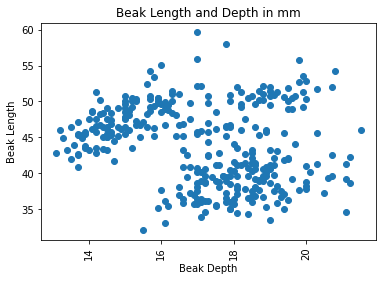

In [7]:
plt.scatter(x=df['Culmen Depth (mm)'], y=df['Culmen Length (mm)'])
plt.title('Beak Length and Depth in mm')
plt.xlabel('Beak Depth')
plt.ylabel('Beak Length')
plt.xticks(rotation='vertical')

Text(0.5, 1.0, 'dividing penguins with a decision boundary')

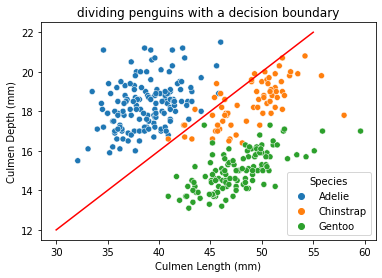

In [10]:
import seaborn as sns
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species')
plt.plot([30, 55], [12, 22], color='r')
plt.title('dividing penguins with a decision boundary')

#### More formatting

Text(0, 0.5, 'Beak Length')

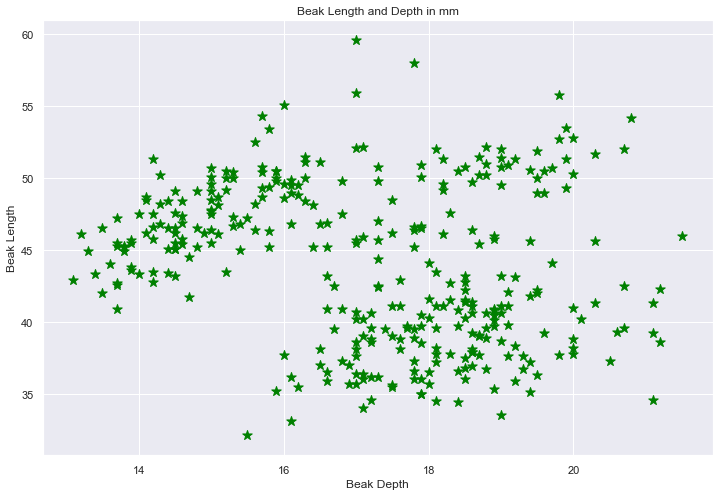

In [117]:
plt.figure(figsize=(12,8))  # order! First step before plot is drawn
plt.scatter(x=df['Culmen Depth (mm)'], y=df['Culmen Length (mm)'], c='green', s=100, marker="*")
plt.title('Beak Length and Depth in mm')
plt.xlabel('Beak Depth')
plt.ylabel('Beak Length')

In [ ]:
# some more formatting options: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html

### Multiple plots in one

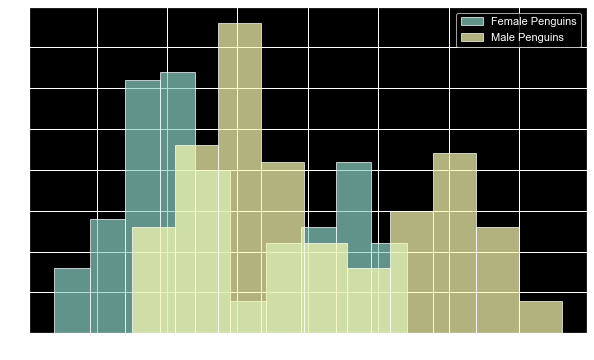

In [118]:
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
plt.hist(df[df['Sex'] == 'FEMALE']['Body Mass (g)'], alpha=0.7, label='Female Penguins')
plt.hist(df[df['Sex'] == 'MALE']['Body Mass (g)'], alpha=0.7, label='Male Penguins');
plt.legend()

In [39]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
    ‘line’：折线图(默认)
    ‘bar’：垂直条形图
    ‘barh’：水平条形图
    ‘hist’：直方图
    ‘box’：箱线图
    ‘where’：内核密度估计图
    “密度”：与”位置”相同
    ‘area’：面积图
    ‘pie’：饼图
    ‘散点图’：散点图
    ‘hexbin’：六边形图


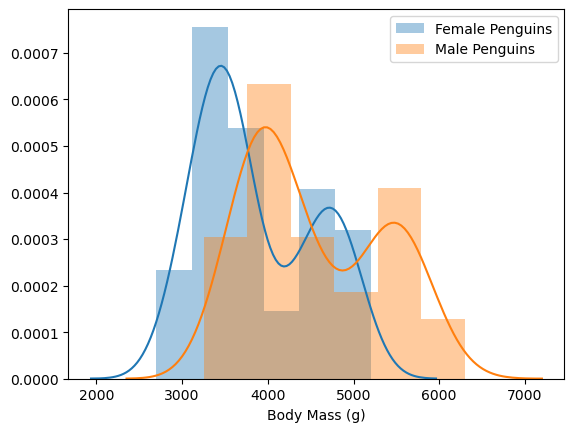

In [121]:
import seaborn as sns
# Plot the histogram thanks to the distplot function
sns.distplot(a=df[df['Sex'] == 'FEMALE']['Body Mass (g)'], hist=True, kde=True,label='Female Penguins', rug=False)
sns.distplot(a=df[df['Sex'] == 'MALE']['Body Mass (g)'], hist=True, kde=True,label='Male Penguins',rug=False)
plt.legend() 
plt.show()

/home/guo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


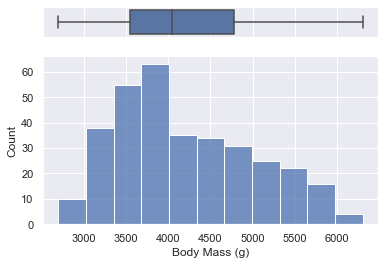

In [10]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["Body Mass (g)"], ax=ax_box)
sns.histplot(data=df, x="Body Mass (g)", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [120]:
sns.reset_defaults()  # jupyter specific 

### Saving plots

In [ ]:
plt.savefig('plot1.png')  # put this in the same cell as the plot 

Gallery: https://matplotlib.org/3.1.0/gallery/index.html  
Great youtube series on matplotlib: https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_

## 3. Plotting with Seaborn
- more examples in the course material

In [ ]:
#!pip install seaborn

In [122]:
import seaborn as sns

Text(0.5, 1.0, 'Colorplot')

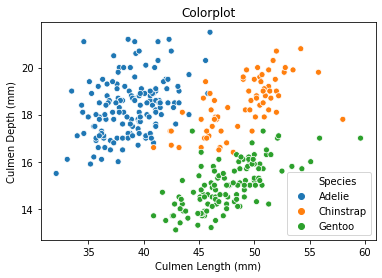

In [22]:
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species')
plt.title('Colorplot')

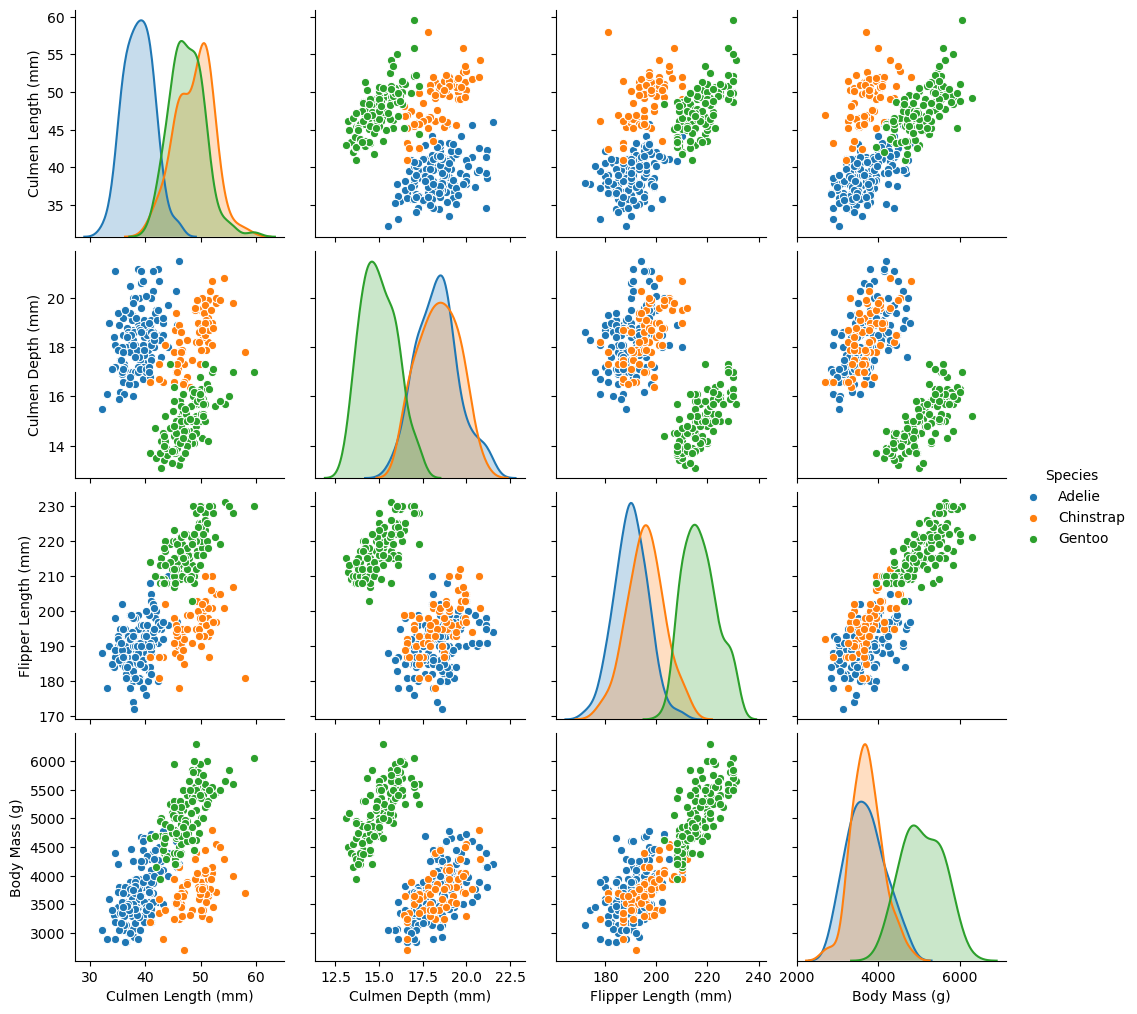

In [48]:
sns.pairplot(data=df, hue='Species')

Plotting inspiration:
    https://python-graph-gallery.com/  
Advice on how to use colors: https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization and https://projects.susielu.com/viz-palette

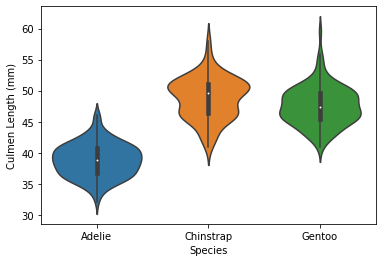

In [25]:
# violinplot() function 
# to edit: check https://www.python-graph-gallery.com/violin-plot/
sns.violinplot(x=df["Species"], y=df["Culmen Length (mm)"])

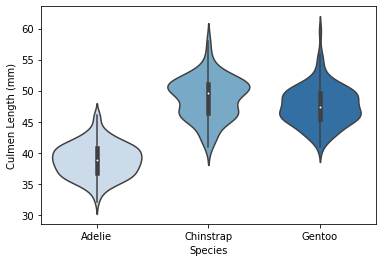

In [28]:
#Control the colors in seaborn violinplots
sns.violinplot(x=df["Species"], y=df["Culmen Length (mm)"], palette="Blues")


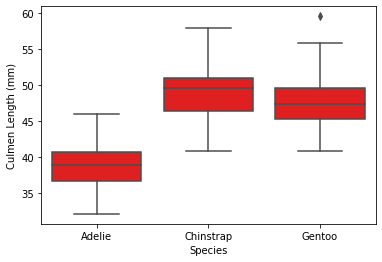

In [39]:
# plot Uniform color
sns.boxplot(x=df["Species"], y=df["Culmen Length (mm)"], color="red")

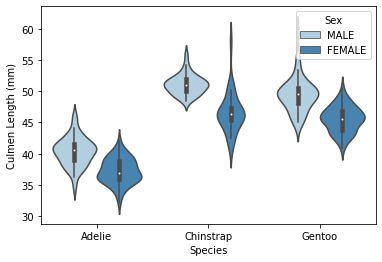

In [34]:
#Grouped violinplots
sns.violinplot(x=df["Species"], y=df["Culmen Length (mm)"], hue=df["Sex"],palette='Blues')

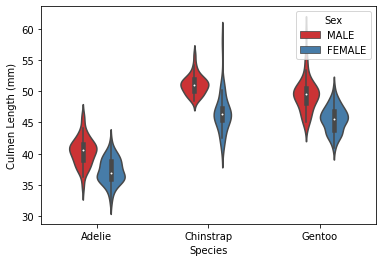

In [36]:
#Grouped violinplots
sns.violinplot(x=df["Species"], y=df["Culmen Length (mm)"], hue=df["Sex"],palette='Set1', width=0.5)

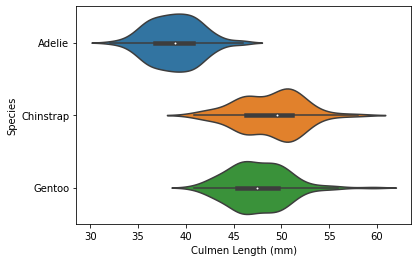

In [27]:
#Horizontal violinplot
sns.violinplot(y=df["Species"], x=df["Culmen Length (mm)"])

In [ ]:
## Exercises with seaborn and matplotlib: 
- Draw a histogram that shows how many penguins of each species are in the data
- Create a plot of your choosing that only shows the data of female Gentoos.
- Create a scatterplot of the culmen length and depth where the size of the markers represent the Body mass of the penguin
- Find at least one more way (besides a scatterplot) to visualize the relationship between culmen lenght and depth (or another bivariate distribution)

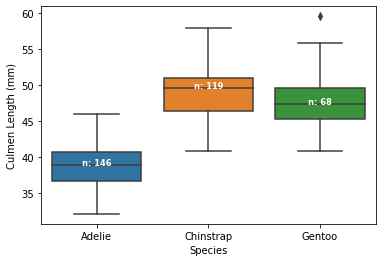

In [64]:
#Draw a histogram that shows how many penguins of each species are in the data
import numpy as np
 
# Basic violinplot stored in a matplotlib.axes object
ax = sns.boxplot(x=df["Species"], y=df["Culmen Length (mm)"])
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['Species'])['Culmen Length (mm)'].median().values
nobs = df['Species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center',
            size='small',
            color='w',
            weight='semibold')
plt.show()

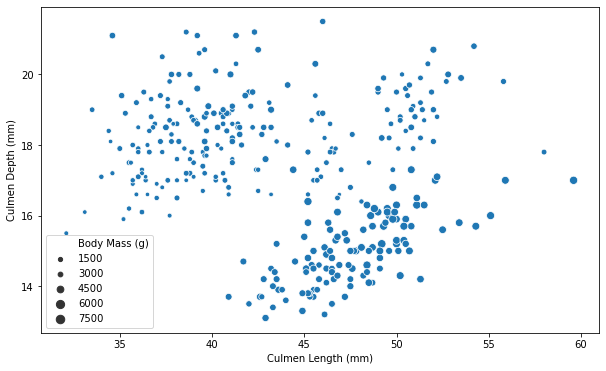

In [63]:
# Create a scatterplot of the culmen length and depth where the size of the markers 
# represent the Body mass of the penguin
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Culmen Length (mm)"], y=df["Culmen Depth (mm)"],size=df["Body Mass (g)"])

In [67]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [5]:
lower_bound = df['Sex'] == 'FEMALE'
upper_bound = df['Species'] == 'Gentoo'
df1=df[lower_bound & upper_bound]

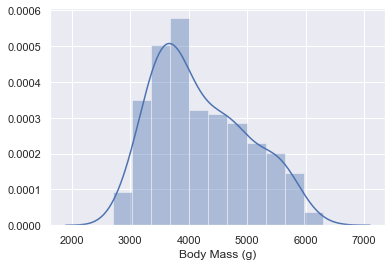

In [96]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.distplot(a=df['Body Mass (g)'], hist=True, kde=True,label='Female Penguins', rug=False)

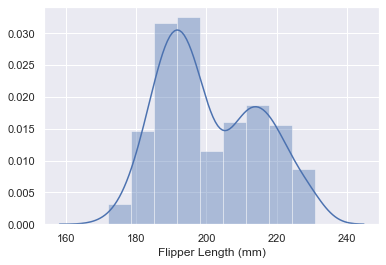

In [97]:
sns.distplot(a=df['Flipper Length (mm)'], hist=True, kde=True,label='Female Penguins', rug=False)

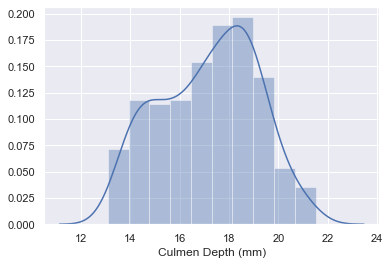

In [98]:
sns.distplot(a=df['Culmen Depth (mm)'], hist=True, kde=True,label='Female Penguins', rug=False)

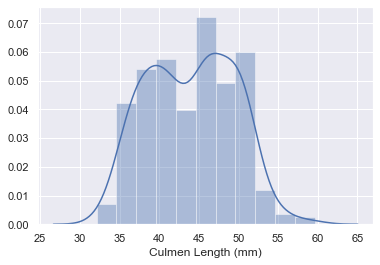

In [100]:
sns.distplot(a=df['Culmen Length (mm)'], hist=True, kde=True,label='Female Penguins', rug=False)

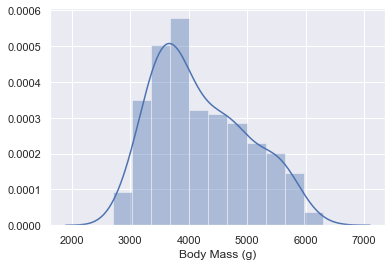

In [99]:
sns.distplot(a=df['Body Mass (g)'], hist=True, kde=True,label='Female Penguins', rug=False)

ValueError: not enough values to unpack (expected 4, got 2)

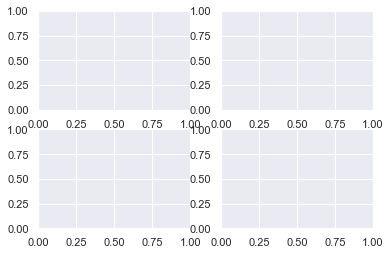

In [6]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=2, ncols=2) 
ax1.plot(df['Culmen Length (mm)'])   #specifies first plot
ax2.plot(df['Culmen Depth (mm)'])     # specifies second plot
ax2.plot(df['Flipper Length (mm)'])  
ax2.plot(df['Body Mass (g)'])  

In [8]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


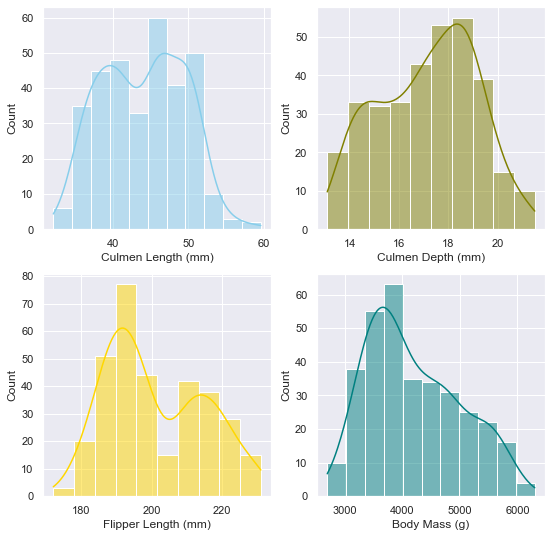

In [9]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(data=df, x="Culmen Length (mm)", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Culmen Depth (mm)", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Flipper Length (mm)", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="Body Mass (g)", kde=True, color="teal", ax=axs[1, 1])

plt.show()

### OPTIONAL: More advanced plotting: see course material chapter 1.10

#### Subplots
In matplotlib, the "figure" is like a container that holds plots (called "axes"). 
You can create a grid of plots, e.g. with two plots in one figure like this: 


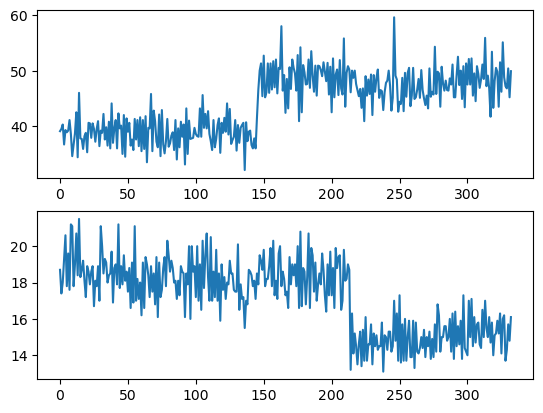

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1) 
ax1.plot(df['Culmen Length (mm)'])   #specifies first plot
ax2.plot(df['Culmen Depth (mm)'])     # specifies second plot

#### 3D plots

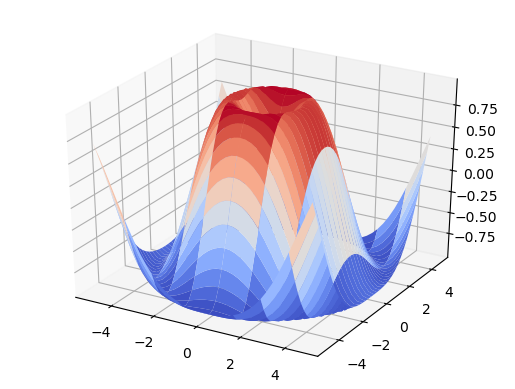

In [50]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=5, cmap=cm.coolwarm)
plt.show()

### Libraries for more plotting:  plotly, bokeh, d3